In [1]:
#------------------------------Importing our libraries------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#------------------------------Reading our data after downloading it------------------------------#
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\COGNORISE\\Third project\\marketing_campaign.csv" , delimiter= "\t")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_info_columns', 50)  # Shows all columns in info output
#pd.set_option('display.max_columns', 100)  # Ensure the value is an integer

# Assesing

what i realized after assesing data is 
- ⚠️ There are 24 nans in income column 
- ✅ there are no duplicates
- 📈 Some great outliers we should remove them
- 🧮 Some columns should be made like age of customer , enrollment time of our customes
- 📊 Column Types: Most columns are numerical, while three are categorical: 'marital_status', 'education', and 'Dt_customer' (which should be converted to a date type).
- Some data types are wrong 

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [5]:
df[df.columns[:21]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df[df.columns[21:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AcceptedCmp4   2240 non-null   int64
 1   AcceptedCmp5   2240 non-null   int64
 2   AcceptedCmp1   2240 non-null   int64
 3   AcceptedCmp2   2240 non-null   int64
 4   Complain       2240 non-null   int64
 5   Z_CostContact  2240 non-null   int64
 6   Z_Revenue      2240 non-null   int64
 7   Response       2240 non-null   int64
dtypes: int64(8)
memory usage: 140.1 KB


In [7]:
# Finding number of nans
df.isna().sum().sum()

24

In [8]:
df.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1341,5510,1977,Master,Married,43263.0,0,1,21-11-2012,2,262,6,61,0,10,102,3,5,2,6,5,0,0,0,0,0,0,3,11,0


In [9]:
#Finding number of duplicates in Dataframe
df.duplicated().sum()

0

# cleaning

what I should clean 
- Droping nans
- Making new columns of age , spend money and enrollment
- deleting outliers
- merging some column in one columns
- changing some data types of columns
- droping unimportant columns

In [10]:
df.dropna(inplace=True)

In [11]:
# Finding amount of money spent by each customer
df["Mntall"] = df["MntWines"] +df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
df["Allchildrehome"] = df["Kidhome"] + df["Teenhome"]

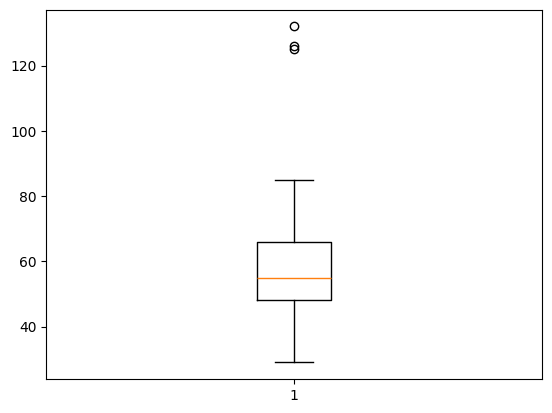

In [12]:
# Outliers in age
df["age"] = 2025 - df["Year_Birth"];
plt.boxplot(df["age"])
df = df[df["age"] < 80 ]

In [13]:
df = df[df["Income"] <= 200000]

In [14]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

C:\Users\Al-arab\AppData\Local\Temp\ipykernel_10192\2850095250.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [15]:
df["enrollment"] = 2024 - df["Dt_Customer"].dt.year

In [16]:
df.drop(df[["ID" , 'Z_CostContact', 'Z_Revenue', 'Response']] ,axis = 1, inplace = True)

In [17]:
df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].replace(0, "")
df["Campaigns"] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].agg(lambda x: ",".join(x.dropna().astype(str)), axis=1)
df["Campaigns"] = df["Campaigns"].replace(",,,," , "No campaigns").str.strip(",,,,")

# Analysis and Visualization

what we want to know
- what is range of the customer's age?
- what is the education of our customers?
- what is the Martial status of our customers?
- what is the range of the customer's income ?
- who takes a lot of time to buy again from us ? (depending on money , age , education , martial status , range of income)
- who buys alot of wines , fruits , meat , fish , sweet and gold ? (depending on money , age , education , martial status , range of income)
- How many complains in last two ywars ? which category camplains most of complains coming from it? 

### 
- Relation between number of children (teens and kids) and the amount of money in last two years (Mntall)

Histing the age of customers 

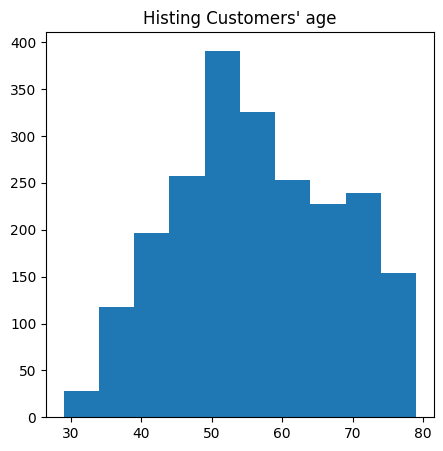

In [18]:
plt.figure(figsize = (5,5))
plt.title("Histing Customers' age")
plt.hist(df["age"]);
# we found that the most of our custommers are between 40 and 60 especialy 50

###
- what is the education of our customers we will value_count them

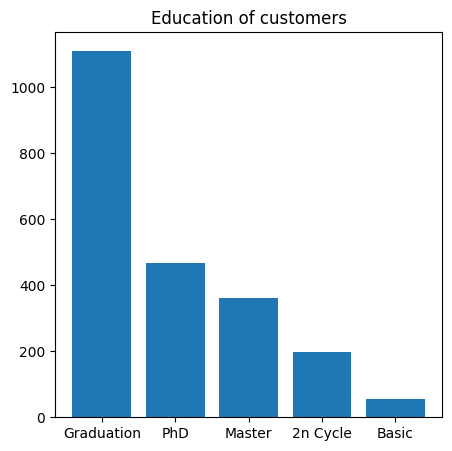

In [19]:
education = df["Education"].value_counts()
plt.figure(figsize = (5, 5))
plt.title("Education of customers")
plt.bar(education.index , education.values);

### 
- what is the Mirtial status of our customers we will value_count them

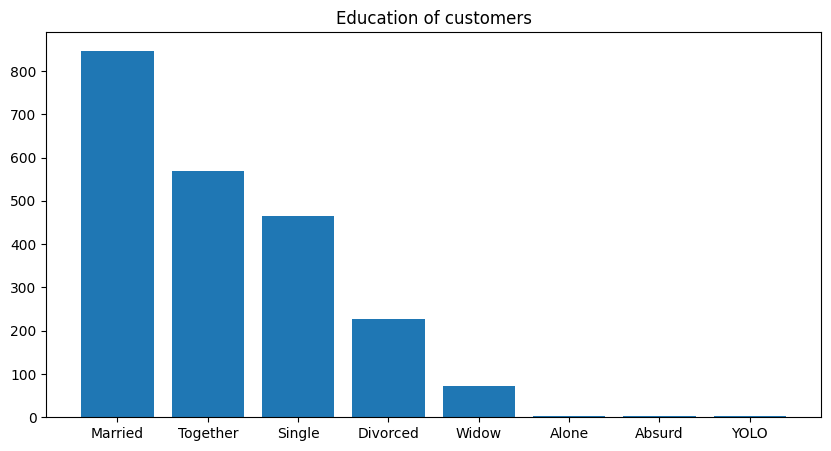

In [20]:
mirtial = df["Marital_Status"].value_counts()
plt.figure(figsize = (10 , 5))
plt.title("Education of customers")
plt.bar(mirtial.index , mirtial.values);
# The two most statuse are married and together

### 
- Range of icome of the customers by histing

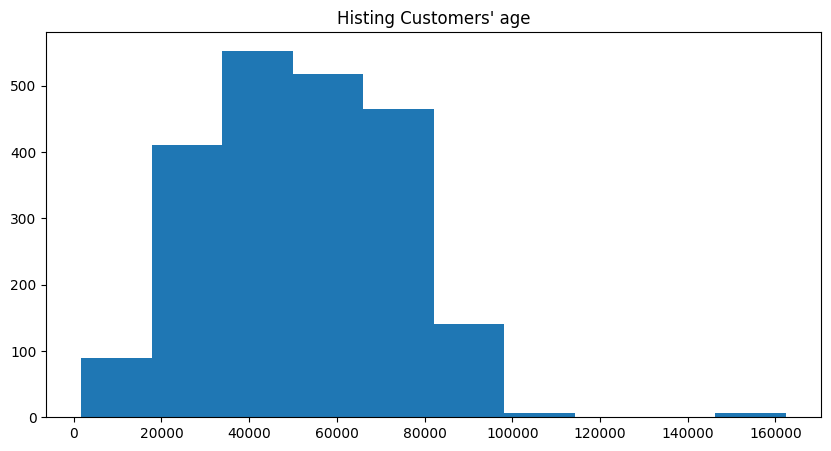

In [21]:
plt.figure(figsize = (10,5))
plt.title("Histing Customers' age")
plt.hist(df["Income"]);
# we found that the most of our custommers' incomes are between 30000 and 60000 especialy 40000

### 
- main function for finding relation between the two variables

In [22]:
def relation(x, y, type='bar', size=(4, 4)):
    # Create the plot with the specified size
    plt.figure(figsize=size)
    
    # Check the type of plot requested
    if type == 'scatter':
        # Use scatter plot
        plt.scatter(df[x], df[y])
    else:
        # Group by the x variable and calculate the first occurrence of y for bar plot
        plotme = df.groupby(x).first()[y]
        plotme.plot(kind=type)
    
    # Add labels and a title for clarity
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Relationship between {x} and {y}')
    
    # Show the plot
    plt.show()



###
- takes a lot of time to buy again from us ? (depending on money , age , education , martial status , range of income)

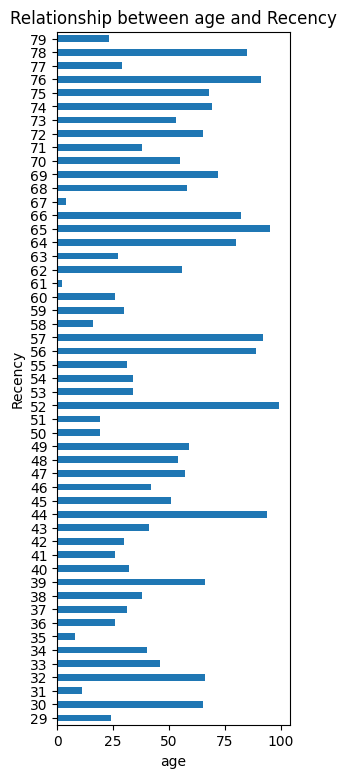

In [23]:
relation("age" , "Recency" , type= "barh" , size = (3,9))

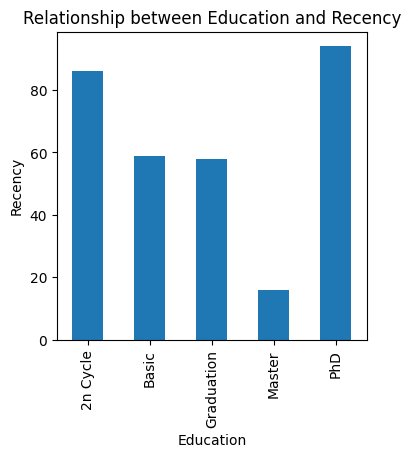

In [24]:
relation("Education" , "Recency" , type= "bar")

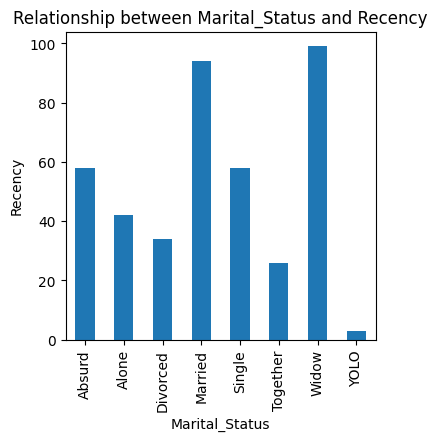

In [25]:
relation("Marital_Status" , "Recency" , type= "bar")

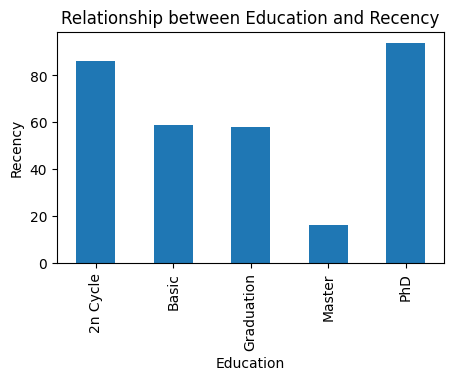

In [26]:
relation("Education" , "Recency" ,size = (5,3))

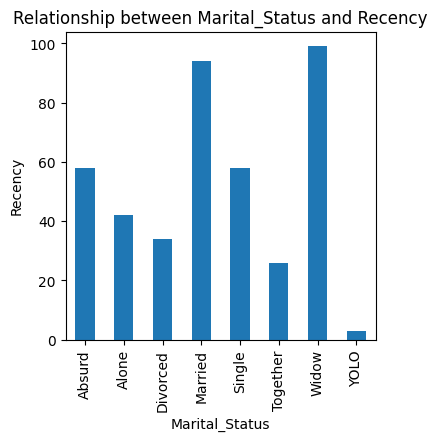

In [27]:
relation("Marital_Status" , "Recency" , type= "bar")

###
- who buys alot of wines , fruits , meat , fish , sweet and gold ? (depending on money , age , education , martial status , range of income)

Wines

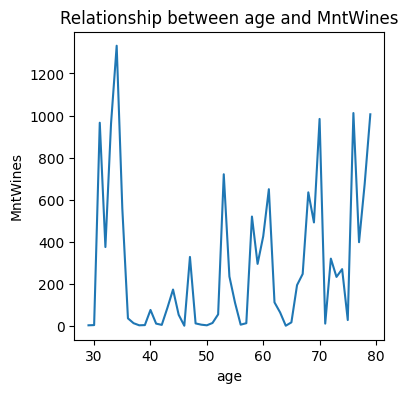

In [28]:
relation("age" , "MntWines" , type= "line")

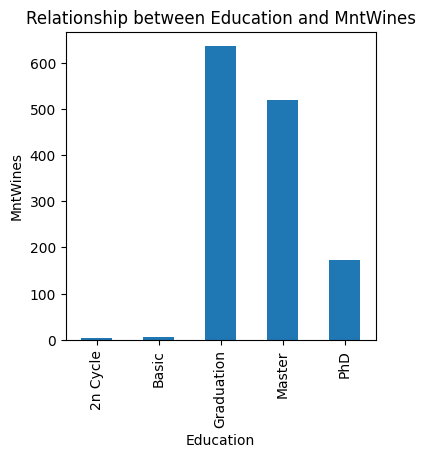

In [29]:
relation("Education" , "MntWines" , type= "bar")

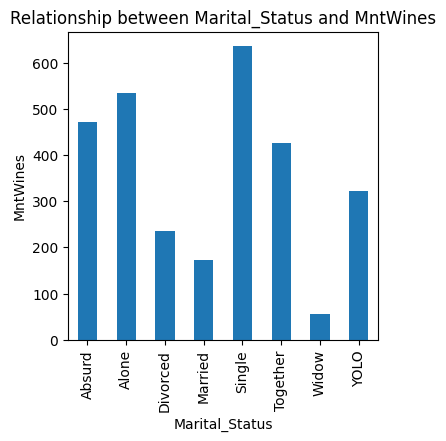

In [30]:
relation("Marital_Status" , "MntWines" , type= "bar")

### 
- fruits

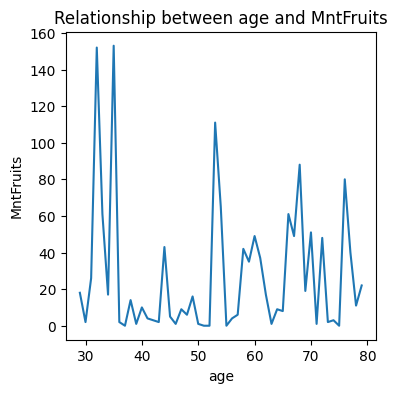

In [31]:
relation("age" , "MntFruits" , type= "line")

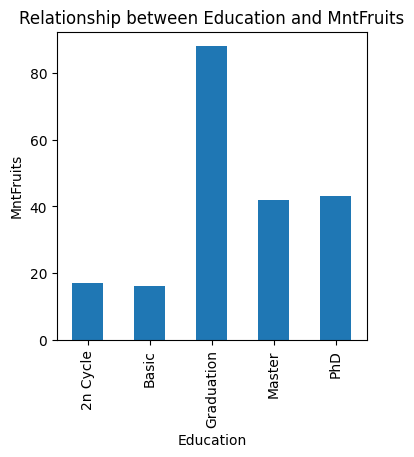

In [32]:
relation("Education" , "MntFruits" , type= "bar")

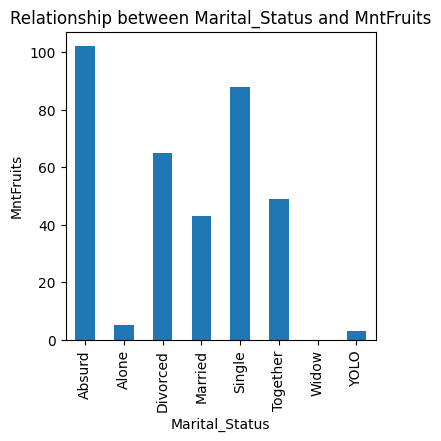

In [33]:
relation("Marital_Status" , "MntFruits" , type= "bar")

### 
- Meatproducts

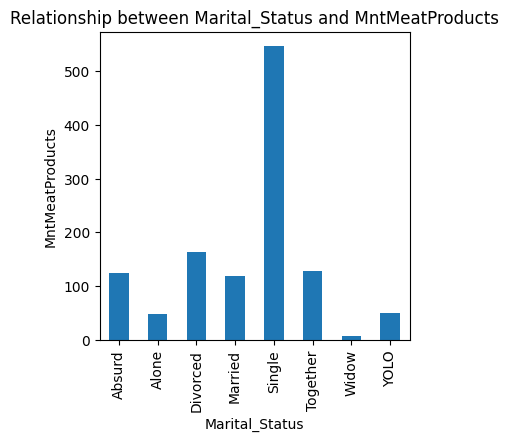

In [34]:
relation("Marital_Status" , "MntMeatProducts" , type= "bar")

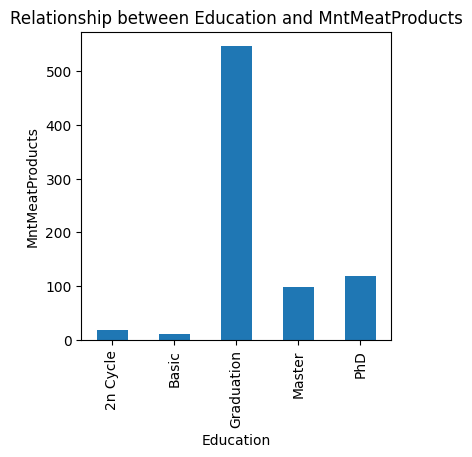

In [35]:
relation("Education" , "MntMeatProducts" , type= "bar")

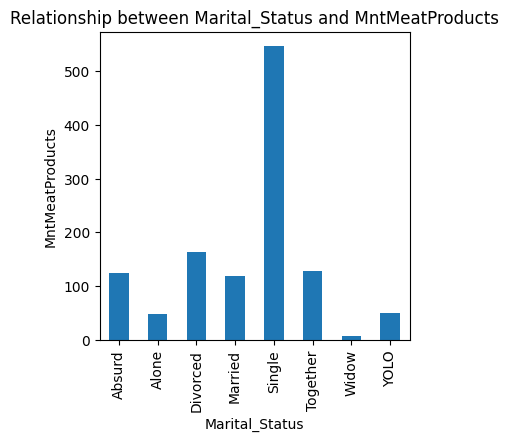

In [36]:
relation("Marital_Status" , "MntMeatProducts" , type= "bar")

###
- FishProducts

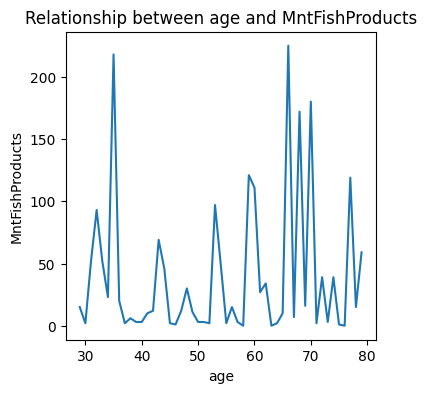

In [37]:
relation("age" , "MntFishProducts" , type= "line")

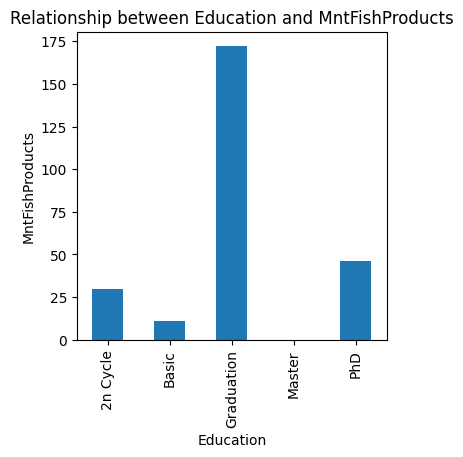

In [38]:
relation("Education" , "MntFishProducts" , type= "bar")

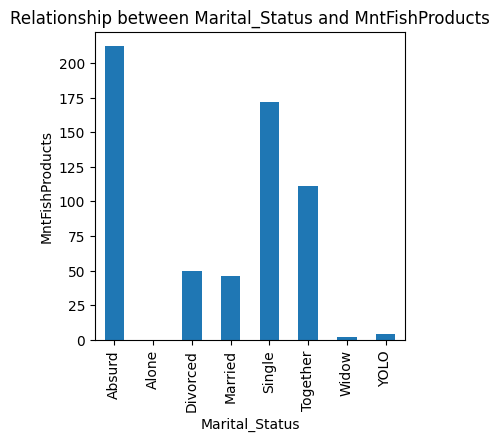

In [39]:
relation("Marital_Status" , "MntFishProducts" , type= "bar")

###
- sweetproducts

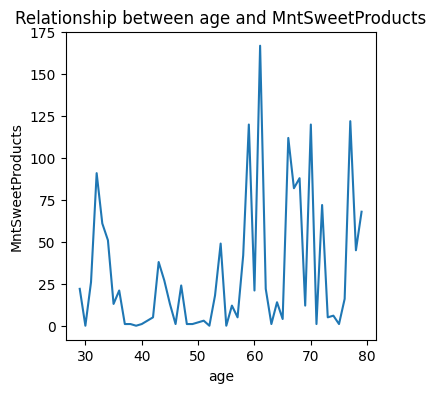

In [40]:
relation("age" , "MntSweetProducts" , type= "line")

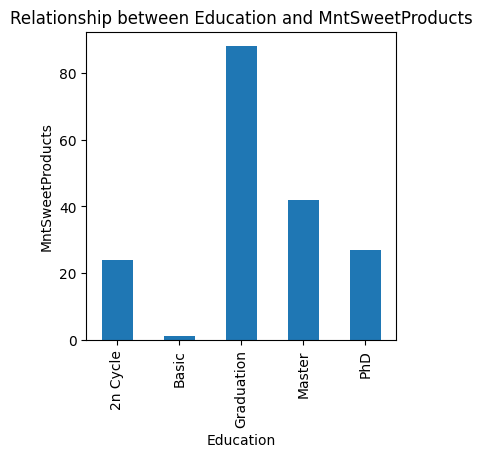

In [41]:
relation("Education" , "MntSweetProducts" , type= "bar")

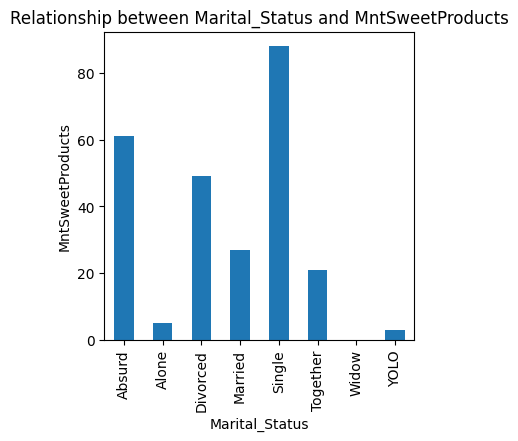

In [42]:
relation("Marital_Status" , "MntSweetProducts" , type= "bar")

###
- goldroducts

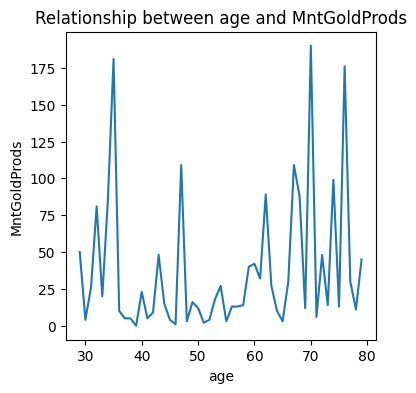

In [43]:
relation("age" , "MntGoldProds" , type= "line")

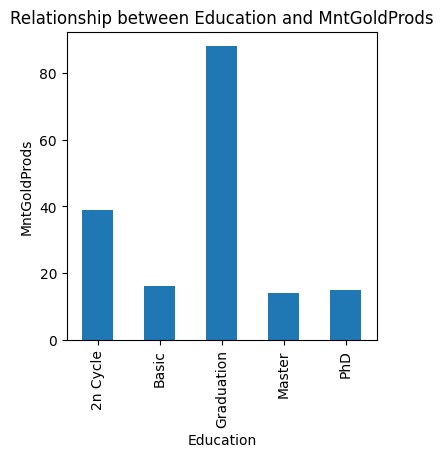

In [44]:
relation("Education" , "MntGoldProds" , type= "bar")

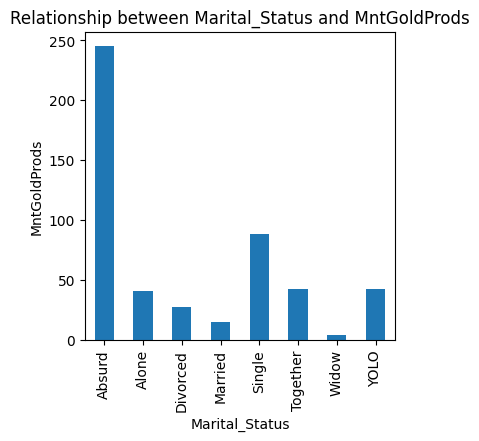

In [45]:
relation("Marital_Status" , "MntGoldProds" , type= "bar")

- what is the best way to buy for each category of customers ? is it web , store or catalog ? which one we should expand depending on it?


### web

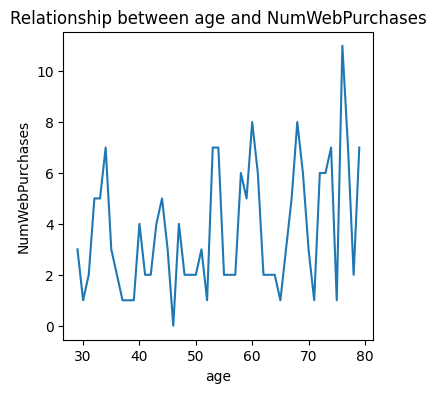

In [46]:
relation("age" , "NumWebPurchases" , type= "line")

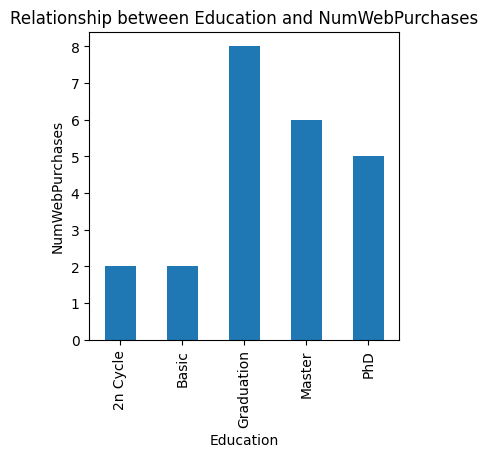

In [47]:
relation("Education" , "NumWebPurchases" , type= "bar")

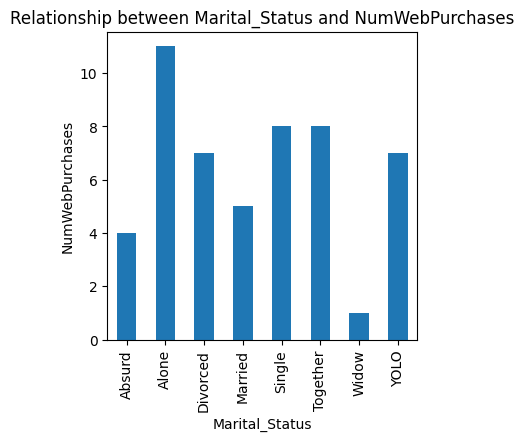

In [48]:
relation("Marital_Status" , "NumWebPurchases" , type= "bar")

### catalog

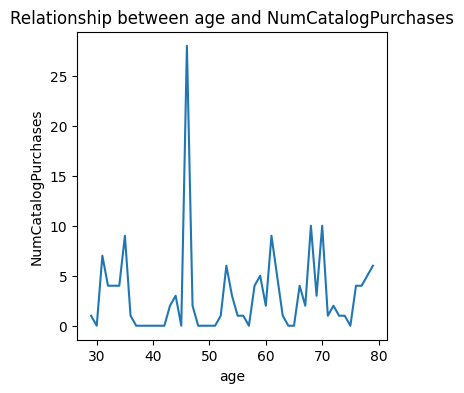

In [49]:
relation("age" , "NumCatalogPurchases" , type= "line")

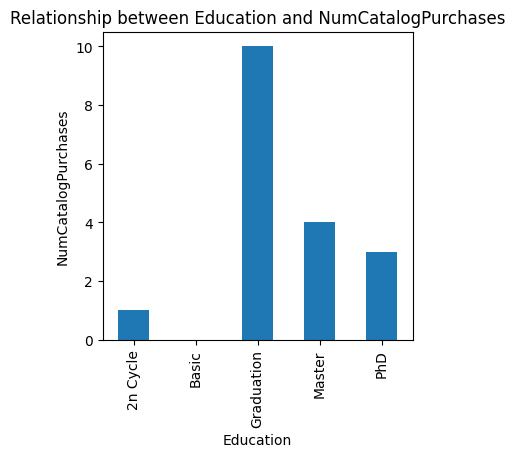

In [50]:
relation("Education" , "NumCatalogPurchases" , type= "bar")

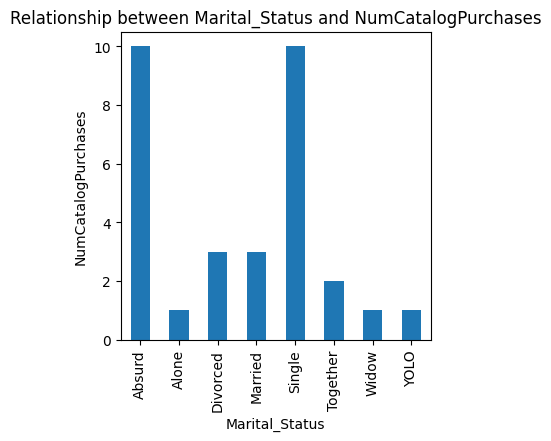

In [51]:
relation("Marital_Status" , "NumCatalogPurchases" , type= "bar")

### Store

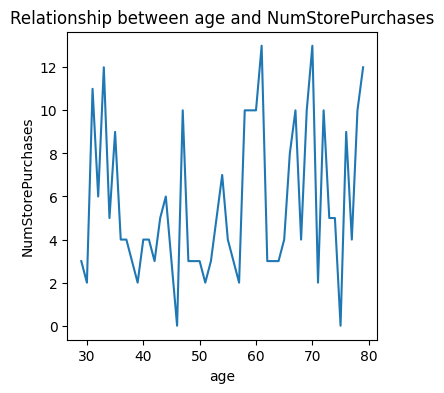

In [52]:
relation("age" , "NumStorePurchases" , type= "line")

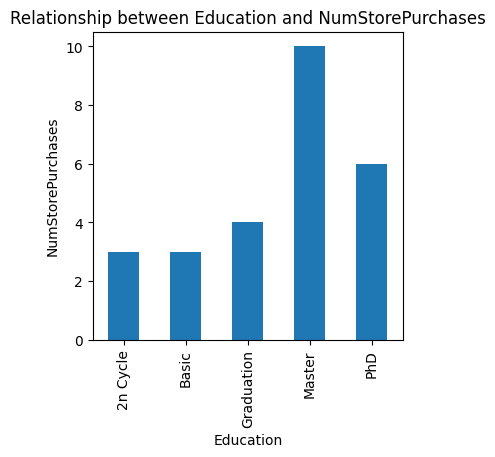

In [53]:
relation("Education" , "NumStorePurchases" , type= "bar")

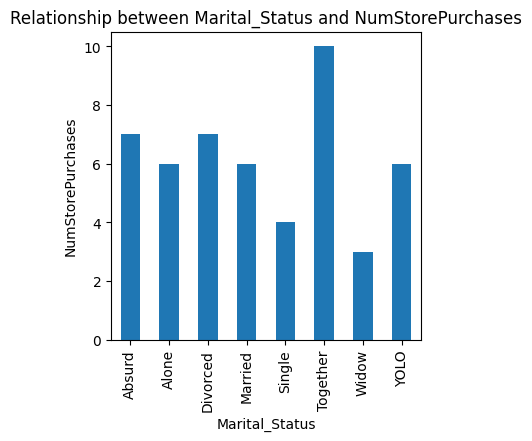

In [54]:
relation("Marital_Status" , "NumStorePurchases" , type= "bar")

### Visits_to_web

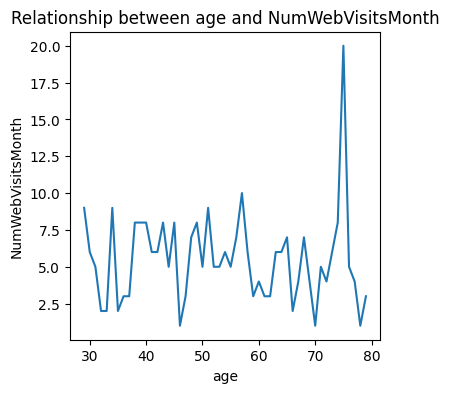

In [55]:
relation("age" , "NumWebVisitsMonth" , type= "line")

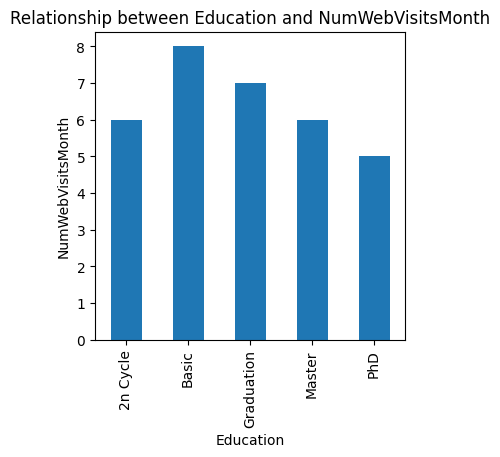

In [56]:
relation("Education" , "NumWebVisitsMonth" , type= "bar")

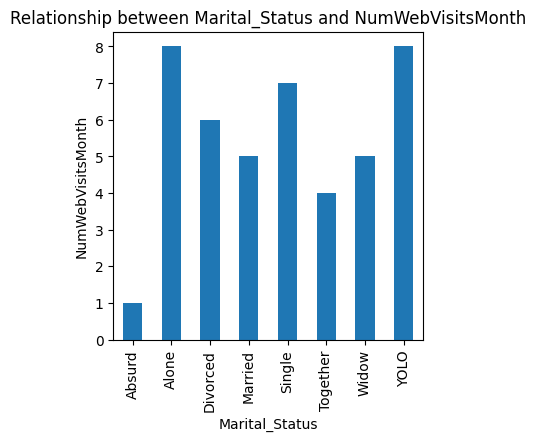

In [57]:
relation("Marital_Status" , "NumWebVisitsMonth" , type= "bar")

### 
- How many complains in last two ywars ? which category camplains most of complains coming from it? 

In [58]:
x = df["Complain"].sum()
print(f"There are {x} in last two years")

There are 19 in last two years
